## Extracting Information from Web Pages

- This tutorial give an quick overview of how to read a web page and then extracts relevant information
- Please make note that scraping certain information from web pages is illegal and please read terms and conditions of the respective website before doing so
- This notebook is mostly educational and does not promote any kind of illegal web scraping and is not responsible if readers of this post do such activity
- For this tutorial, the BeautifulSoup (https://www.crummy.com/software/BeautifulSoup/) APIs will be used. If not installed, use pip install beautifulsoup4

In [129]:
import warnings
warnings.filterwarnings('ignore')

In [130]:
import requests
from bs4 import BeautifulSoup

### Enter the amazon product page which contains the product reviews 

In [131]:
url = '''https://www.amazon.in/product-reviews/B085J19V4P/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=all_stars&reviewerType=all_reviews&pageNumber=1'''

In [132]:
review_html = requests.get(url).text

In [133]:
review_html[0:1000]

'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,41N8FDnTmPL.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,01l9iDpr-DL.css,41EWOOlBJ9L.css,11UoGyLuXoL.css,01ElnPiDxWL.css,11QxHU4QYaL.css,01Sp8sB1HiL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01evdoiemkL.css,01oDR3IULNL.css,31zpKVx8wkL.css,01XPHJk60-L.css,01Jb-VvL4uL.css,21LK7jaicML.css,11L58Qpo0GL.css,21kyTi1FabL.css,01ruG+gDPFL.css,01egbgkonWL.css,21GwE3cR-yL

In [134]:
# Initialize the beautifulsoup framework
soup = BeautifulSoup(review_html, 'lxml')

In [135]:
## Extract the review title
review_titles = soup.findAll('a', 
                             {'data-hook': 'review-title'}
                             #{'class': 'a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold'}
                            )

In [136]:
review_titles

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1GISPFBHGONWN?ASIN=B085J19V4P">
 <span>Disappointing service by Amazon</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R4BHVQTT81Q1D?ASIN=B085J19V4P">
 <span>Poor screen quality</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RW5MN87A8GU6G?ASIN=B085J19V4P">
 <span>Don't Fall on Youtubers Review</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R36HX393OAMKI6?ASIN=B085J19V4P">
 <span>First experience shifting to OnePlus</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-

In [137]:
## Extract the complete review texts
review_texts = soup.findAll('span', 
                            {'class': 'a-size-base review-text review-text-content'})    

In [141]:
all_urls = []
for i in range(10):
    if i == 0:
        all_urls.append( url )
    else:
        all_urls.append( url[:-1] + "&pageNumber=" + str(i+1) )

In [142]:
all_urls

['https://www.amazon.in/product-reviews/B085J19V4P/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=all_stars&reviewerType=all_reviews&pageNumber=1',
 'https://www.amazon.in/product-reviews/B085J19V4P/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=all_stars&reviewerType=all_reviews&pageNumber=&pageNumber=2',
 'https://www.amazon.in/product-reviews/B085J19V4P/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=all_stars&reviewerType=all_reviews&pageNumber=&pageNumber=3',
 'https://www.amazon.in/product-reviews/B085J19V4P/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=all_stars&reviewerType=all_reviews&pageNumber=&pageNumber=4',
 'https://www.amazon.in/product-reviews/B085J19V4P/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=all_stars&reviewerType=all_reviews&pageNumber=&pageNumber=5',
 'https://www.amazon.in/product-reviews/B085J19V4P/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=all_stars&reviewerType=all_reviews&pageNumber=&pageNumber=6',
 'https://www.amazon.in/product-reviews/B085J1

In [143]:
all_review_texts = []
for each_url in all_urls:
    review_html = requests.get(each_url).text
    soup = BeautifulSoup(review_html, 'lxml')
    review_texts = soup.findAll('span', {'class': 'a-size-base review-text review-text-content'}) 
    this_review_texts = [r.text for r in review_texts]
    all_review_texts = all_review_texts + this_review_texts

In [144]:
all_review_texts[0:2]

['\n\n  This review is about the big blunder done by Oneplus and Amazon.I ordered the 12 gb RAM variant on Oct 17 and received the 8 gb RAM variant on Oct 19. I immediately notified Amazon support and they agreed that wrong item has been sent. I asked them for replacement and they said that product is out of stock, I can add it to wishlist and once I get notified that it\'s available, I should call them and request for replacement. So, they delegated their job to me.It became available again in the evening of Oct 19, so I called them back and asked them to order the replacement as I wasn\'t able to do it on my own. I was kept on hold for 15 minutes and then told to disconnect as the team wasn\'t available.I called them again after some time and then the service executive said that he is unable to, but his leads and managers will create a replacement request in next 1-2 minutes. Those 2 minutes never ended and I was on the call with them for more than an hour which again ended in disapp

In [147]:
len(all_review_texts)

80

In [148]:
# Remove all characters other than alpha numerics from the review titles as well
import re
r_titles = list( map( lambda x: re.sub("[^a-zA-Z]", " ", x ), all_review_texts ))

In [149]:
r_titles[0:1]

['    This review is about the big blunder done by Oneplus and Amazon I ordered the    gb RAM variant on Oct    and received the   gb RAM variant on Oct     I immediately notified Amazon support and they agreed that wrong item has been sent  I asked them for replacement and they said that product is out of stock  I can add it to wishlist and once I get notified that it s available  I should call them and request for replacement  So  they delegated their job to me It became available again in the evening of Oct     so I called them back and asked them to order the replacement as I wasn t able to do it on my own  I was kept on hold for    minutes and then told to disconnect as the team wasn t available I called them again after some time and then the service executive said that he is unable to  but his leads and managers will create a replacement request in next     minutes  Those   minutes never ended and I was on the call with them for more than an hour which again ended in disappointm

In [150]:
import pandas as pd
review_df = pd.DataFrame(r_titles)

In [151]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', 
                      max_words=25, max_font_size=60).generate(str(r_titles))

In [152]:
import matplotlib.pyplot as plt 
import seaborn as sn
%matplotlib inline

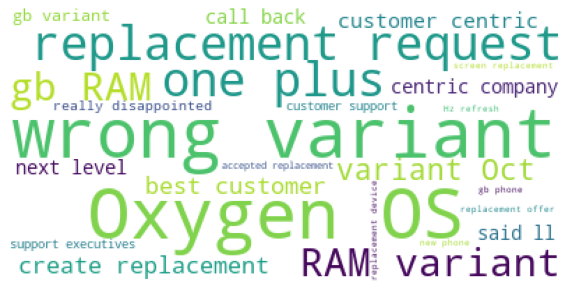

In [153]:
plt.figure( figsize = (10,10))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [154]:
from wordcloud import WordCloud, STOPWORDS

In [155]:
len(STOPWORDS)

190

In [156]:
wordcloud = WordCloud(background_color='white', 
                      stopwords=STOPWORDS, 
                      max_words=25, max_font_size=60, 
                      random_state=42).generate(str(r_titles))

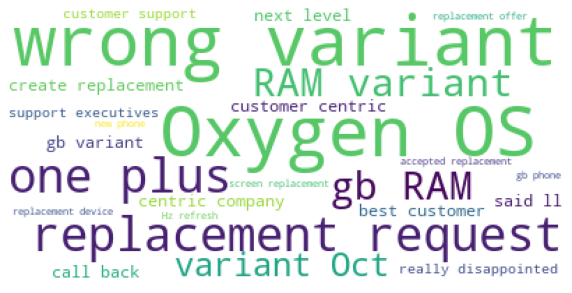

In [157]:
plt.figure( figsize = (10,10))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [158]:
STOPWORDS = set( list(STOPWORDS) + ['OnePlus', 'Amazon', 'will', 'one plus', 'app'])

In [159]:
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, 
                      max_words=25, max_font_size=60, random_state=42).generate(str(r_titles))

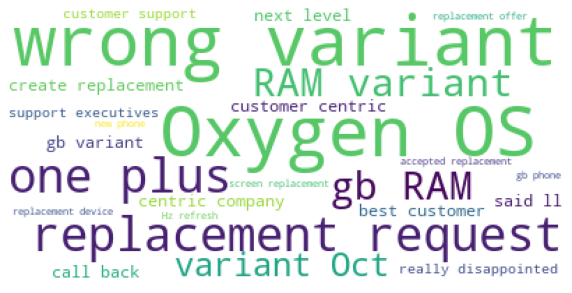

In [160]:
plt.figure( figsize = (10,10))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()